In [37]:
# Importing and loading dataset...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
path = "/content/Data Set _ automobile - Sheet1.csv"
df = pd.read_csv(path)

print("File loaded:", path)
print("Shape:", df.shape)
df.head()


File loaded: /content/Data Set _ automobile - Sheet1.csv
Shape: (61, 10)


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450


In [38]:
# Helper function: finding a column in df by keyword list (case-insensitive)...

def find_col(df, keywords):
    cols = df.columns.tolist()
    lcols = [c.lower() for c in cols]
    for kw in keywords:
        for i, lc in enumerate(lcols):
            if kw.lower() in lc:
                return cols[i]
    return None
print("Columns in dataset:")
for c in df.columns:
    print(" -", c)


Columns in dataset:
 - index
 - company
 - body-style
 - wheel-base
 - length
 - engine-type
 - num-of-cylinders
 - horsepower
 - average-mileage
 - price


QUESTION A


Is there any missing values in the data? If yes, drop the rows with missing values.

In [39]:
print("Missing values per column (before):")
print(df.isnull().sum())

df = df.replace('?', np.nan)

print("\nMissing values per column (after replacing '?'):")
print(df.isnull().sum())

if df.isnull().any(axis=1).sum() > 0:
    before = df.shape[0]
    df = df.dropna().reset_index(drop=True)
    after = df.shape[0]
    print(f"\nDropped {before-after} rows with missing values. New shape: {df.shape}")
else:
    print("\nNo missing values found. No rows dropped.")


Missing values per column (before):
index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

Missing values per column (after replacing '?'):
index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

No missing values found. No rows dropped.


QUESTION B
1. which are the cars with minimum or maximum price?

In [40]:
price_col = find_col(df, ['price', 'cost', 'selling price', 'msrp'])
if price_col is None:
    print("Price column not found. Available columns:\n", df.columns.tolist())
else:
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

    df = df.dropna(subset=[price_col]).reset_index(drop=True)
    min_price = df[price_col].min()
    max_price = df[price_col].max()

    print("Minimum price:", min_price)
    print(df[df[price_col] == min_price].head(10))
    print("\nMaximum price:", max_price)
    print(df[df[price_col] == max_price].head(10))


Minimum price: 5151
    index    company body-style  wheel-base  length engine-type  \
13     16  chevrolet  hatchback        88.4   141.1           l   

   num-of-cylinders  horsepower  average-mileage  price  
13            three          48               47   5151  

Maximum price: 45400
    index        company body-style  wheel-base  length engine-type  \
35     47  mercedes-benz    hardtop       112.0   199.2        ohcv   

   num-of-cylinders  horsepower  average-mileage  price  
35            eight         184               14  45400  


QUESTION B

2. How many cars are there with different body-styles?

Body-style column detected: 'body-style'

body-style
sedan          32
hatchback      15
wagon           9
convertible     3
hardtop         2
Name: count, dtype: int64


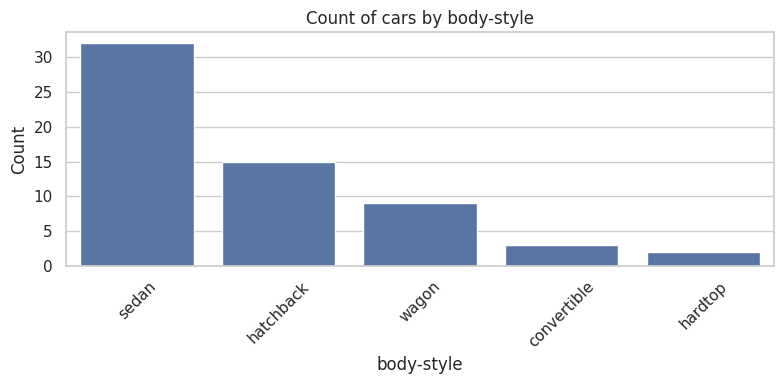

In [41]:
body_col = find_col(df, ['body', 'body-style', 'bodystyle', 'body style'])
if body_col is None:
    print("Body-style column not found. Available columns:\n", df.columns.tolist())
else:
    counts = df[body_col].value_counts()
    print(f"Body-style column detected: '{body_col}'\n")
    print(counts)
    plt.figure(figsize=(8,4))
    sns.barplot(x=counts.index, y=counts.values)
    plt.xlabel(body_col)
    plt.ylabel("Count")
    plt.title("Count of cars by body-style")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



QUESTION B

3. What is the average price of all body types of cars? Arrange them in descending order

Average price by body type (descending):


,body-style,avg_price
0,hardtop,39714.000000
1,convertible,22341.000000
2,sedan,17152.250000
3,wagon,12730.111111
4,hatchback,7466.800000


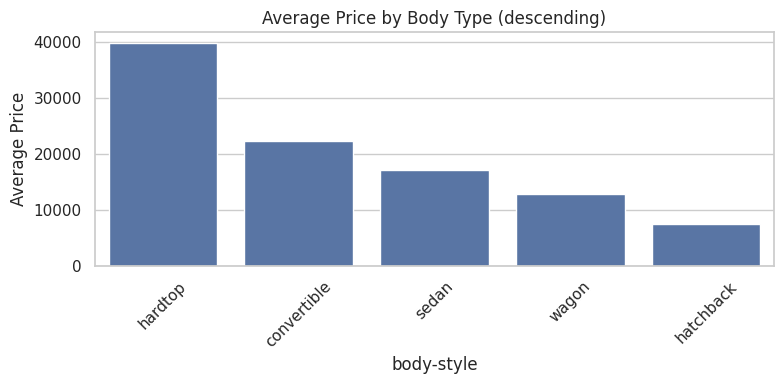

In [42]:
if price_col is None or body_col is None:
    print("Cannot compute average price by body type — missing price or body-style column.")
else:
    avg_by_body = df.groupby(body_col)[price_col].mean().sort_values(ascending=False)
    print("Average price by body type (descending):")
    display(avg_by_body.reset_index().rename(columns={0:'avg_price', price_col:'avg_price'}))
    # bar plot
    plt.figure(figsize=(8,4))
    sns.barplot(x=avg_by_body.index, y=avg_by_body.values)
    plt.xlabel(body_col)
    plt.ylabel("Average Price")
    plt.title("Average Price by Body Type (descending)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


QUESTION B

4. What is the average price of cars by different companies? Arrange them in descending order

Company column detected: 'company'

Average price by company (descending):


,company,avg_price
0,mercedes-benz,35040.000000
1,jaguar,34600.000000
2,porsche,27608.000000
3,bmw,27213.333333
4,audi,16392.500000
5,alfa-romero,15498.333333
6,volvo,13177.500000
7,honda,10195.000000
8,mazda,9654.800000
9,volkswagen,8435.000000


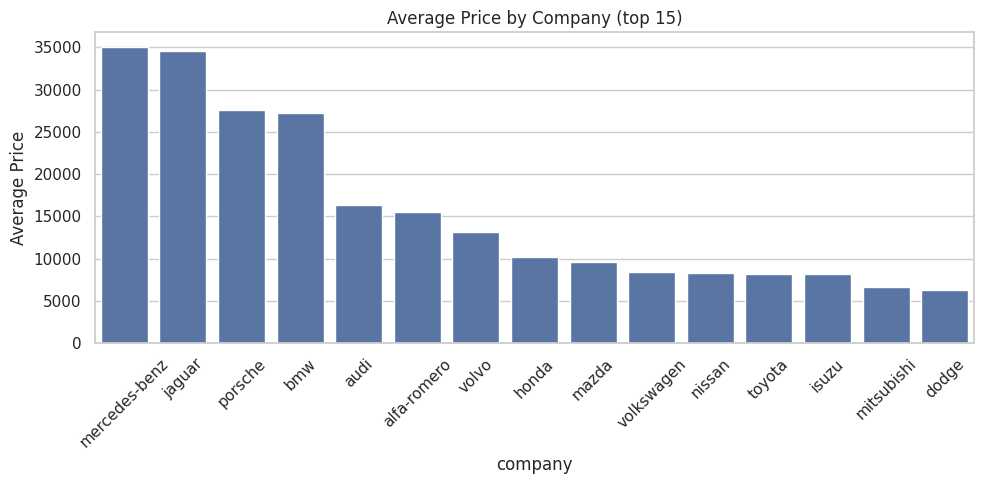

In [43]:
company_col = find_col(df, ['company', 'maker', 'manufacturer', 'make'])
if company_col is None:
    print("Company column not found. Available columns:\n", df.columns.tolist())
else:
    avg_by_company = df.groupby(company_col)[price_col].mean().sort_values(ascending=False)
    print(f"Company column detected: '{company_col}'")
    print("\nAverage price by company (descending):")
    display(avg_by_company.reset_index().rename(columns={price_col:'avg_price'}))
    plt.figure(figsize=(10,5))
    sns.barplot(x=avg_by_company.index[:15], y=avg_by_company.values[:15])
    plt.xlabel(company_col)
    plt.ylabel("Average Price")
    plt.title("Average Price by Company (top 15)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


QUESTION B

5. Count car types have different number cylinders?

num-of-cylinders  eight  five  four  six  three  twelve  two
company                                                     
alfa-romero           0     0     2    1      0       0    0
audi                  0     3     1    0      0       0    0
bmw                   0     0     2    4      0       0    0
chevrolet             0     0     2    0      1       0    0
dodge                 0     0     2    0      0       0    0


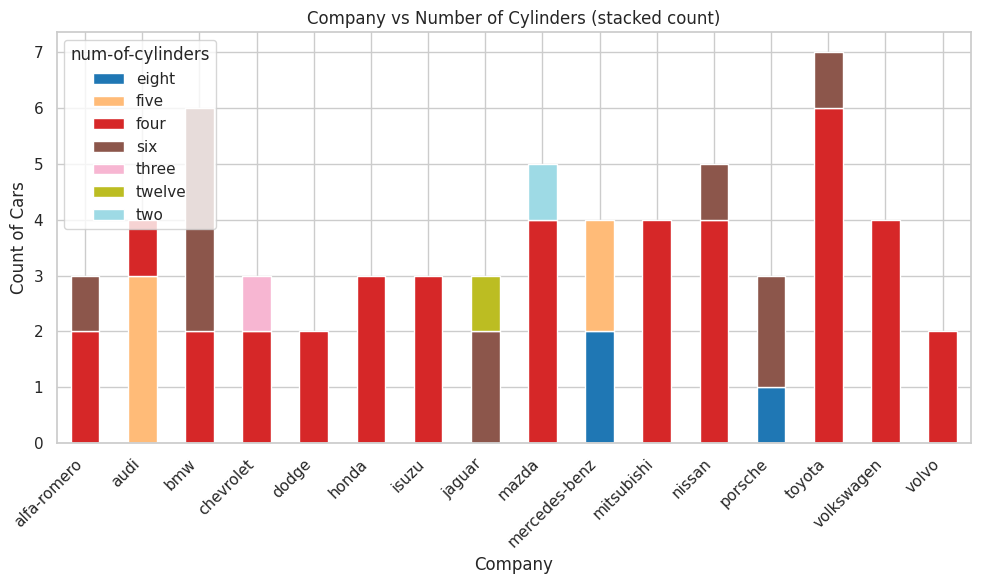

In [46]:
# ✅ Count of cars by company and number of cylinders...

company_cyl_count = df.groupby(['company', 'num-of-cylinders']).size().unstack(fill_value=0)

print(company_cyl_count.head())
company_cyl_count.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Company vs Number of Cylinders (stacked count)")
plt.ylabel("Count of Cars")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Count of car body styles by number of cylinders:
num-of-cylinders  eight  five  four  six  three  twelve  two
body-style                                                  
convertible           0     0     2    1      0       0    0
hardtop               1     0     0    1      0       0    0
hatchback             1     0    11    1      1       0    1
sedan                 1     3    20    7      0       1    0
wagon                 0     2     6    1      0       0    0


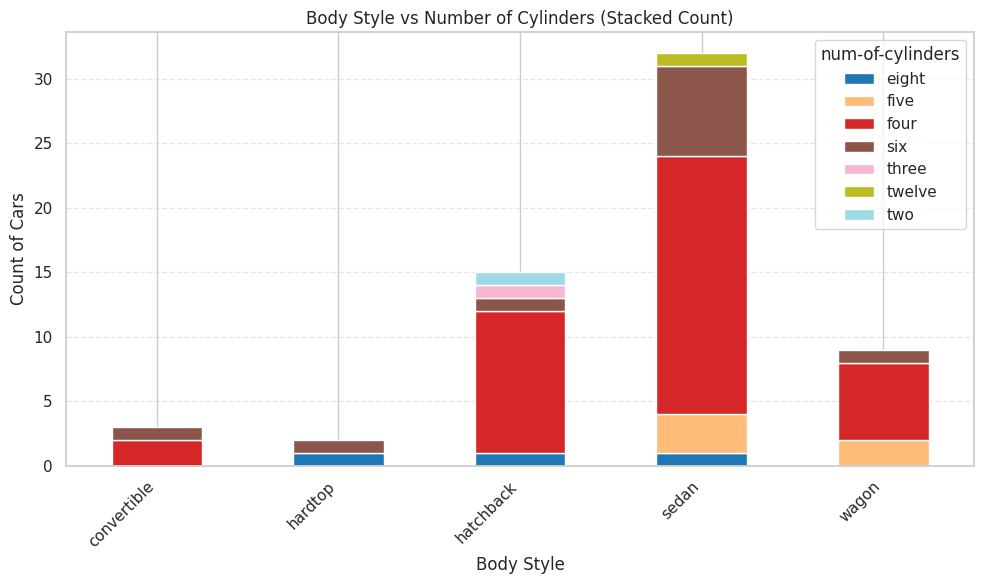

In [47]:
# ✅ Count how many cars of each body style have different cylinder types...

body_cyl_count = df.groupby(['body-style', 'num-of-cylinders']).size().unstack(fill_value=0)

print("Count of car body styles by number of cylinders:")
print(body_cyl_count)
body_cyl_count.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Body Style vs Number of Cylinders (Stacked Count)")
plt.xlabel("Body Style")
plt.ylabel("Count of Cars")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **DATA VISUALIZATION**

In [36]:
hp_col = find_col(df, ['horsepower', 'hp', 'horse power'])
engine_col = find_col(df, ['engine', 'engine-type', 'engine type', 'enginetype'])

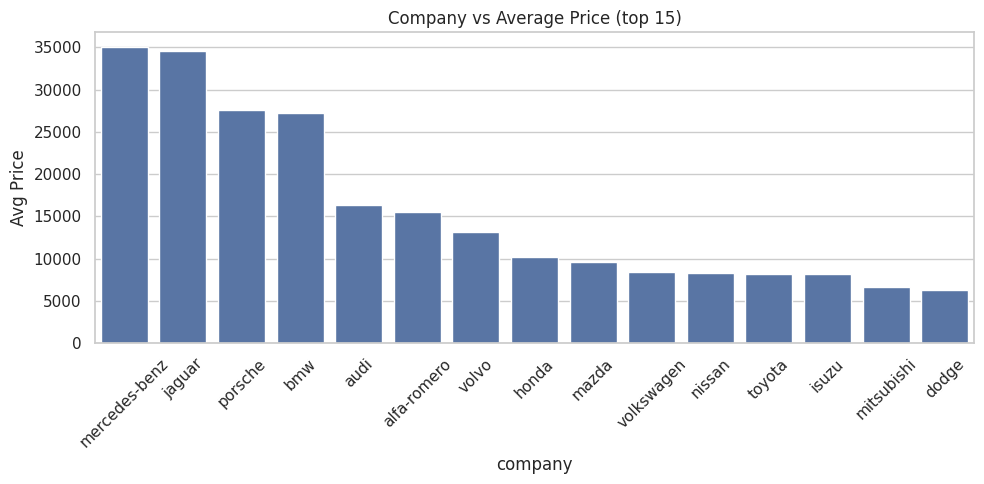

In [48]:
# Company & price (top 15)...

if company_col is not None and price_col is not None:
    plt.figure(figsize=(10,5))
    order = df.groupby(company_col)[price_col].mean().sort_values(ascending=False).index[:15]
    sns.barplot(x=order, y=df.groupby(company_col)[price_col].mean().loc[order].values)
    plt.title("Company vs Average Price (top 15)")
    plt.xlabel(company_col); plt.ylabel("Avg Price")
    plt.xticks(rotation=45); plt.tight_layout(); plt.show()

<Figure size 1100x600 with 0 Axes>

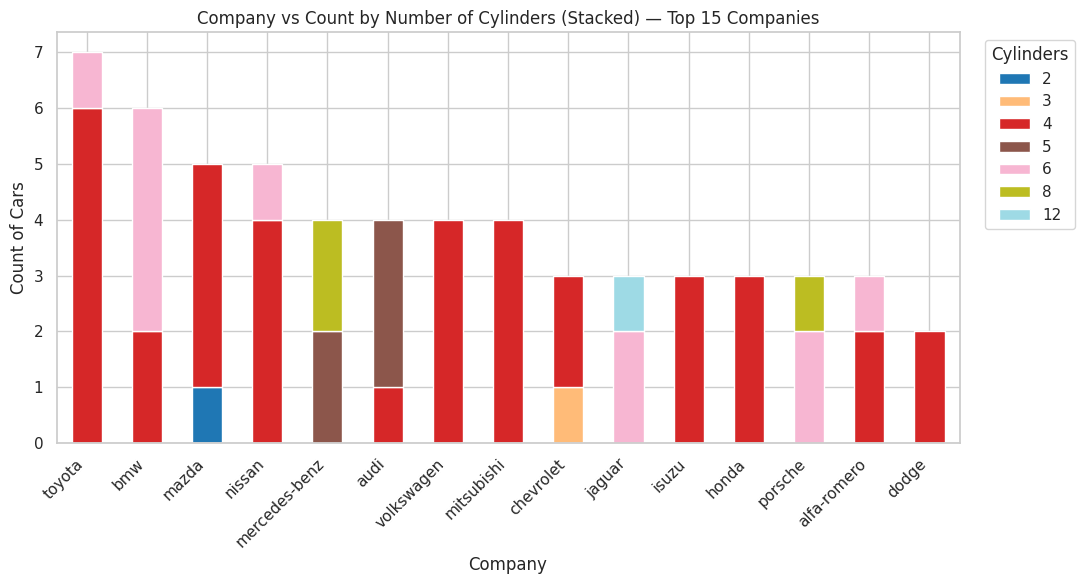


Preview of counts (top 15 companies):


,2,3,4,5,6,8,12
company,,,,,,,
toyota,0,0,6,0,1,0,0
bmw,0,0,2,0,4,0,0
mazda,1,0,4,0,0,0,0
nissan,0,0,4,0,1,0,0
mercedes-benz,0,0,0,2,0,2,0
audi,0,0,1,3,0,0,0
volkswagen,0,0,4,0,0,0,0
mitsubishi,0,0,4,0,0,0,0
chevrolet,0,1,2,0,0,0,0


In [49]:
# Company vs Count by Number of Cylinders...

import pandas as pd
import matplotlib.pyplot as plt

company_col = "company"
cyl_col = "num-of-cylinders"
price_col = "price"

if company_col not in df.columns or cyl_col not in df.columns:
    print("Required columns not found. Available columns:\n", df.columns.tolist())
else:

    cyl_map = {"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}

    def to_num_or_label(x):
        if pd.isna(x):
            return "unknown"
        xs = str(x).strip().lower()

        if xs.isdigit():
            return int(xs)

        if xs in cyl_map:
            return cyl_map[xs]

        return str(x)
    df['cyl_numeric_or_label'] = df[cyl_col].apply(to_num_or_label)

    counts = df.groupby([company_col, 'cyl_numeric_or_label']).size().unstack(fill_value=0)

    counts['Total'] = counts.sum(axis=1)
    counts = counts.sort_values('Total', ascending=False).head(15)
    counts = counts.drop(columns='Total')
    counts.columns = [str(c) for c in counts.columns]

    plt.figure(figsize=(11,6))
    counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(11,6))
    plt.title("Company vs Count by Number of Cylinders (Stacked) — Top 15 Companies")
    plt.xlabel("Company")
    plt.ylabel("Count of Cars")
    plt.legend(title='Cylinders', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("\nPreview of counts (top 15 companies):")
    display(counts)


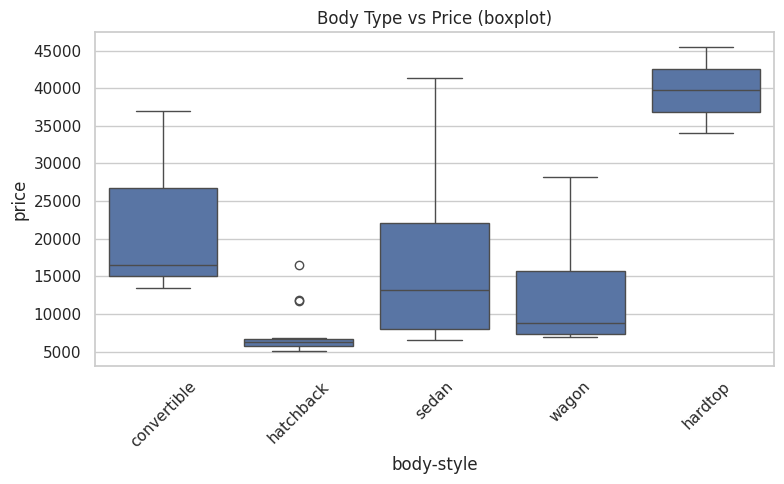

In [50]:
# Body type & price...

if body_col is not None and price_col is not None:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=body_col, y=price_col, data=df)
    plt.title("Body Type vs Price (boxplot)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

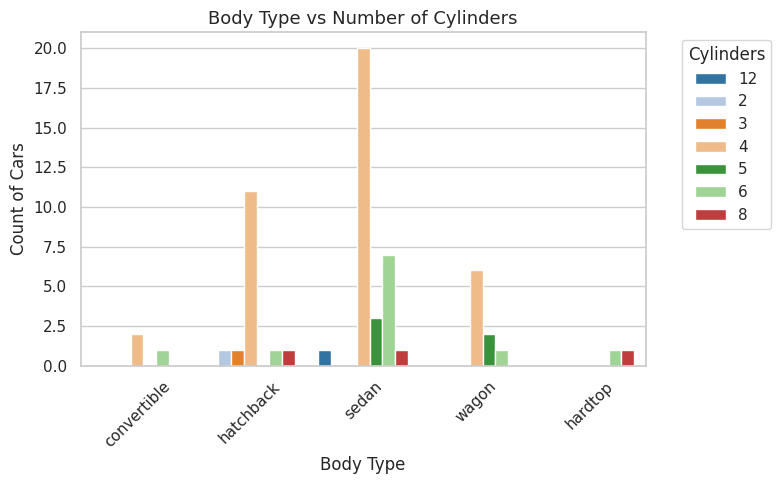

In [51]:
# Body type & cylinders...

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

body_col = "body-style"
cyl_col = "num-of-cylinders"
cyl_map = {
    "two": "2", "three": "3", "four": "4", "five": "5",
    "six": "6", "eight": "8", "twelve": "12"
}

df['cyl_clean'] = df[cyl_col].astype(str).str.strip().str.lower().replace(cyl_map)

df['cyl_clean'] = pd.Categorical(df['cyl_clean'],
                                 categories=sorted(df['cyl_clean'].unique()),
                                 ordered=True)

plt.figure(figsize=(8,5))
sns.countplot(x=body_col, hue='cyl_clean', data=df, palette='tab20')
plt.title("Body Type vs Number of Cylinders", fontsize=13)
plt.xlabel("Body Type")
plt.ylabel("Count of Cars")
plt.xticks(rotation=45)
plt.legend(title='Cylinders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


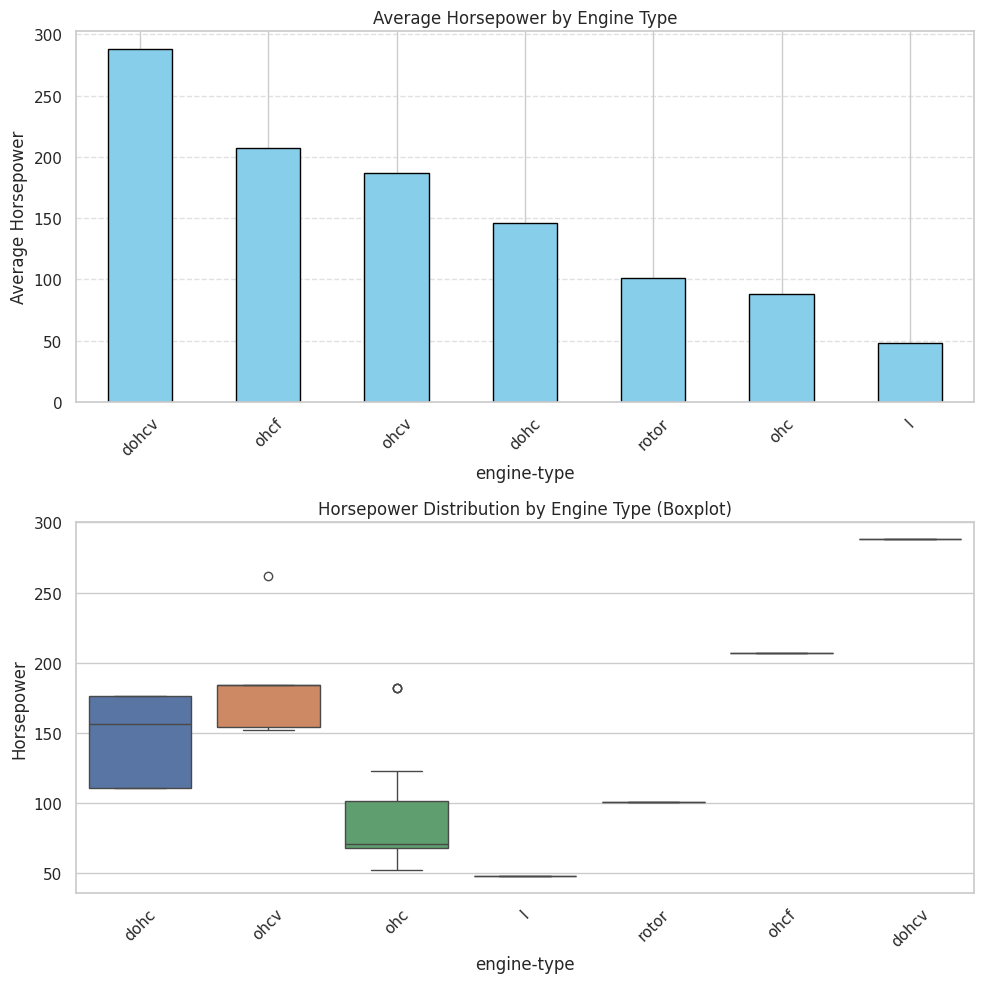

In [54]:
# Engine Type vs Horsepower – Bar Chart + Boxplot...

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

avg_hp = df.groupby('engine-type')['horsepower'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
avg_hp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Horsepower by Engine Type")
plt.ylabel("Average Horsepower")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.subplot(2,1,2)
sns.boxplot(x='engine-type', y='horsepower', data=df, hue='engine-type', legend=False)
plt.title("Horsepower Distribution by Engine Type (Boxplot)")
plt.ylabel("Horsepower")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
